<a href="https://colab.research.google.com/github/anshupandey/Natural_language_Processing/blob/master/Pre_trained_Word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-trained Word Embeddings


Natural Language Processing (NLP) has witnessed a massive surge in performance and usability thanks to **transfer learning**—a technique that allows models trained on large, general-purpose datasets to be adapted for specific tasks with minimal additional data and computational resources.

**Word embeddings** lie at the heart of many modern NLP solutions. They transform raw text into numeric vectors (or “embeddings”) that capture semantic and syntactic relationships among words. By leveraging **pre-trained** embeddings, you tap into general language knowledge that has already been learned, saving time, computing power, and often boosting accuracy.

---

## What Is Transfer Learning?

**Transfer learning** in NLP typically involves these steps:

1. **Pre-training**: A large language model is trained on extensive text data (e.g., Wikipedia, Common Crawl). The model “learns” linguistic patterns such as syntax, semantics, and general context.  
2. **Fine-tuning**: The pre-trained model is then adapted to a specific downstream task (like sentiment analysis, text classification, or named entity recognition) by adding specialized layers or re-training part of the network.

In the context of **word embeddings**, transfer learning involves taking embeddings that have been learned on massive, general corpora and using them as a starting point for your own NLP tasks.

---

## Why Use Word Embeddings?

Traditional NLP pipelines often relied on “bag-of-words” or “one-hot encoding” representations that only captured the presence or frequency of words without retaining word order or contextual nuance. Word embeddings overcame these limitations by providing:

- **Dense, low-dimensional representations** (e.g., a 300-dimensional vector vs. a large one-hot vector).  
- **Semantic relationships** (similar words have similar embedding vectors, enabling models to detect analogies and synonyms).  
- **Reduced sparsity** (better generalization and less memory overhead than one-hot encodings).  

By starting with **pre-trained word embeddings**, you get a strong language understanding “for free,” letting you focus on the downstream tasks that matter.

---



In [ ]:
!pip install gensim --quiet

## Word2vec

### Word2Vec

**Word2Vec** (by Google) is one of the first widespread word embedding models. It comes in two flavors:
- **CBOW (Continuous Bag of Words)**: Predicts a word based on its context.  
- **Skip-gram**: Predicts the surrounding words given a target word.

It generates embeddings by learning co-occurrence relationships over large corpora (e.g., Google News). Pre-trained Word2Vec embeddings are often 300-dimensional and remain popular for simpler NLP pipelines.

**Pros**:
- Easy to integrate.
- Well-studied, with a large community of support.

**Cons**:
- Context-independent: The embedding for a word does not change based on surrounding words.

---


In [ ]:
import gensim.downloader as api

# 1. Load a pre-trained Word2Vec model
#    This is the Google News 300-dim version (~1.6GB).
w2v_model = api.load("word2vec-google-news-300")

# 2. Generate word embedding for "king"
king_vector = w2v_model["king"]

print(f"Vector for 'king': {king_vector[:10]}... (truncated)")

# 3. Compute similarity between two words
similarity_king_queen = w2v_model.similarity("king", "queen")
print(f"Similarity between 'king' and 'queen': {similarity_king_queen:.4f}")

# 4. Find most similar words to "king"
most_similar_to_king = w2v_model.most_similar("king", topn=5)
print("Top 5 words similar to 'king':")
for word, score in most_similar_to_king:
    print(f"  {word}: {score:.4f}")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vector for 'king': [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]... (truncated)
Similarity between 'king' and 'queen': 0.6511
Top 5 words similar to 'king':
  kings: 0.7138
  queen: 0.6511
  monarch: 0.6413
  crown_prince: 0.6204
  prince: 0.6160


## GloVe


### GloVe (Global Vectors)

**GloVe** (by Stanford) is another widely-used method that mixes matrix factorization techniques with local context windows. Key differences from Word2Vec include the objective function’s focus on **global co-occurrence statistics**.

**Pros**:
- Captures both local and global context information.
- Available pre-trained on Common Crawl and Wikipedia.

**Cons**:
- Similar context-independence limitation as Word2Vec.

---



In [ ]:
import gensim.downloader as api

# 1. Load a pre-trained GloVe model
#    Options: "glove-wiki-gigaword-50", "glove-wiki-gigaword-100",
#    "glove-wiki-gigaword-200", "glove-wiki-gigaword-300"
glove_model = api.load("glove-wiki-gigaword-100")

# 2. Generate word embedding for "king"
king_vector_glove = glove_model["king"]
print(f"Vector for 'king': {king_vector_glove[:10]}... (truncated)")

# 3. Compute similarity between two words
similarity_king_queen_glove = glove_model.similarity("king", "queen")
print(f"Similarity between 'king' and 'queen' (GloVe): {similarity_king_queen_glove:.4f}")

# 4. Find most similar words to "king"
most_similar_to_king_glove = glove_model.most_similar("king", topn=5)
print("Top 5 words similar to 'king' (GloVe):")
for word, score in most_similar_to_king_glove:
    print(f"  {word}: {score:.4f}")


[==================================================] 100.0% 128.1/128.1MB downloaded
Vector for 'king': [-0.32307 -0.87616  0.21977  0.25268  0.22976  0.7388  -0.37954 -0.35307
 -0.84369 -1.1113 ]... (truncated)
Similarity between 'king' and 'queen' (GloVe): 0.7508
Top 5 words similar to 'king' (GloVe):
  prince: 0.7682
  queen: 0.7508
  son: 0.7021
  brother: 0.6986
  monarch: 0.6978


## FastText

### FastText

**FastText** (by Facebook AI Research) extends Word2Vec by learning embeddings for **subword units (n-grams)**. This means it can generate embeddings for out-of-vocabulary (OOV) words by composing subword embeddings.

**Pros**:
- Handles rare and unseen words better (due to subword information).
- Often outperforms Word2Vec and GloVe on tasks involving morphologically rich languages.

**Cons**:
- More computationally intensive to train compared to standard Word2Vec.

---


In [ ]:
import gensim.downloader as api

# 1. Load a pre-trained FastText model
#    For instance, "fasttext-wiki-news-subwords-300"
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

# 2. Generate word embedding for "king"
king_vector_fasttext = fasttext_model["king"]
print(f"Vector for 'king': {king_vector_fasttext[:10]}... (truncated)")

# 3. Compute similarity between two words
similarity_king_queen_fasttext = fasttext_model.similarity("king", "queen")
print(f"Similarity between 'king' and 'queen' (FastText): {similarity_king_queen_fasttext:.4f}")

# 4. Find most similar words to "king"
most_similar_to_king_fasttext = fasttext_model.most_similar("king", topn=5)
print("Top 5 words similar to 'king' (FastText):")
for word, score in most_similar_to_king_fasttext:
    print(f"  {word}: {score:.4f}")


[==================================================] 100.0% 958.5/958.4MB downloaded
Vector for 'king': [-0.12063    0.0051695 -0.012447  -0.0078528 -0.023738  -0.082595
  0.04579   -0.15382    0.06455    0.12893  ]... (truncated)
Similarity between 'king' and 'queen' (FastText): 0.7704
Top 5 words similar to 'king' (FastText):
  king-: 0.7838
  boy-king: 0.7705
  queen: 0.7704
  prince: 0.7701
  kings: 0.7669


## ELmo


### ELMo (Embeddings from Language Models)

**ELMo** (by the Allen Institute for AI) is an early model in the family of **contextual** word embeddings. ELMo:
- Uses a bidirectional LSTM (biLSTM) trained on a language modeling objective.
- Produces embeddings that vary according to the entire sentence context.

**Pros**:
- Context-sensitive embeddings, improving over static Word2Vec or GloVe vectors.
- Marked improvement in many downstream tasks.

**Cons**:
- Larger model size and slower inference than static embeddings.

---



In [ ]:
!pip install allennlp==2.10.0 --quiet  # or any version compatible with your environment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.2/594.2 kB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Reason for being yanked: Broken dependencies. Please upgrade to 12.2.0 or later
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.8/729.8 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.8/229.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119

In [28]:
!pip install --upgrade accelerate huggingface_hub --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.5/450.5 kB 9.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cached-path 1.1.6 requires huggingface-hub<0.11.0,>=0.8.1, but you have huggingface-hub 0.27.0 which is incompatible.
peft 0.14.0 requires torch>=1.13.0, but you have torch 1.11.0 which is incompatible.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.20.1 which is incompatible.


In [29]:
import torch
import numpy as np
from allennlp.modules.elmo import Elmo, batch_to_ids

# 1. Define ELMo options: These configuration files and weight files are from the AllenNLP repository.
options_file = "https://storage.googleapis.com/allennlp-public-models/elmo_2x4096_512_2048cnn_2xhighway_options.json"
weight_file  = "https://storage.googleapis.com/allennlp-public-models/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"

# Create the ELMo embedder
elmo = Elmo(options_file, weight_file, num_output_representations=1, dropout=0)

# 2. Prepare input text (tokenized)
sentence_1 = ["The", "king", "loves", "his", "queen"]
sentence_2 = ["The", "cat", "sat", "on", "the", "mat"]
sentences = [sentence_1, sentence_2]

# 3. Convert tokens to character IDs
character_ids = batch_to_ids(sentences)  # shape: (batch_size, sentence_length, max_word_length)

# 4. Get ELMo embeddings
elmo_embeddings = elmo(character_ids)  # returns a dict with 'elmo_representations' & 'mask'
# elmo_embeddings["elmo_representations"][0] is of shape: (batch_size, sentence_length, embedding_dim=1024)

# Extract the representation for each token in each sentence
rep_1 = elmo_embeddings["elmo_representations"][0][0]  # embedding for sentence_1
rep_2 = elmo_embeddings["elmo_representations"][0][1]  # embedding for sentence_2

# 5. Let's compare the vector for "king" in sentence_1 to "queen" in sentence_1
#    "king" is at index 1, "queen" is at index 4
king_vector_elmo = rep_1[1].detach().numpy()
queen_vector_elmo = rep_1[4].detach().numpy()

# 6. Similarity check (cosine similarity)
def cosine_similarity(vec_a, vec_b):
    dot = np.dot(vec_a, vec_b)
    norm_a = np.linalg.norm(vec_a)
    norm_b = np.linalg.norm(vec_b)
    return dot / (norm_a * norm_b)

similarity_king_queen_elmo = cosine_similarity(king_vector_elmo, queen_vector_elmo)
print(f"ELMo Cosine Similarity ('king' vs 'queen'): {similarity_king_queen_elmo:.4f}")

# Similarly, you could compare word embeddings across different sentences
# to gauge semantic relatedness in context.


FileNotFoundError: https://storage.googleapis.com/allennlp-public-models/elmo_2x4096_512_2048cnn_2xhighway_options.json

## 5. How to Use Pre-Trained Embeddings

The process of integrating pre-trained embeddings into your NLP pipeline typically looks like this:

1. **Download the Pre-Trained Embeddings**: Obtain the embeddings (e.g., `word2vec.300d.txt`, `glove.840B.300d.txt`) or use a framework like `gensim` for Word2Vec and GloVe, or `torchtext` for PyTorch.  
2. **Load the Embeddings**: Use libraries such as `gensim` (for Word2Vec, GloVe, FastText) or `transformers` (for BERT/GPT).  
3. **Embed Your Text**:  
   - For static embeddings (Word2Vec, GloVe, FastText): Convert each word or token to its corresponding embedding vector.  
   - For contextual embeddings (ELMo, BERT, GPT): Pass entire sentences through the model, and extract the embeddings from the model’s hidden layers.  
4. **Integrate into Your Model**: These embeddings become the input features for downstream tasks like classification, question answering, or entity recognition.  

---

   



In [8]:
!pip install gensim torch --quiet

In [13]:
import gensim.downloader as api
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
# Download Word2Vec embeddings trained on Google News
w2v_model = api.load("word2vec-google-news-300")

In [5]:
# Provided Dataset is a list of text samples (site engineer notes) and their labels
# Let's map the categories as follows:
#   Critical -> 2
#   Moderately Critical -> 1
#   Non Critical -> 0

url = "https://raw.githubusercontent.com/anshupandey/Natural_language_Processing/refs/heads/master/Data/telecom_site_notes_classification.csv"
data = pd.read_csv(url)
texts = data['text']
labels = data['label']
classes = ['Non Crticial','Moderately Critical','Critical']


In [6]:
def text_to_embedding(text):
    tokens = text.lower().split()
    valid_tokens = [token for token in tokens if token in w2v_model]
    if not valid_tokens:
        # Fallback to a zero vector if no token is recognized
        return np.zeros(300)
    # Average word embeddings
    return np.mean([w2v_model[token] for token in valid_tokens], axis=0)

X = np.array([text_to_embedding(t) for t in texts])
y = np.array(labels)


In [21]:
# Convert labels to one-hot encoding for 3 classes
num_classes = 3
y_onehot = np.zeros((len(y), num_classes))
y_onehot[np.arange(len(y)), y] = 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42,stratify=y_onehot)


In [22]:
# Define the model
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out



In [23]:
# Initialize the model, loss function, and optimizer
input_size = 300
hidden_size = 128  # You can adjust this
model = Classifier(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [24]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
  # Convert to tensors
  inputs = torch.tensor(X_train, dtype=torch.float32)
  labels = torch.tensor(np.argmax(y_train, axis=1), dtype=torch.long) # Use argmax for class indices

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, labels)

  # Backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.0386
Epoch [20/100], Loss: 0.9405
Epoch [30/100], Loss: 0.8081
Epoch [40/100], Loss: 0.6533
Epoch [50/100], Loss: 0.4978
Epoch [60/100], Loss: 0.3621
Epoch [70/100], Loss: 0.2565
Epoch [80/100], Loss: 0.1808
Epoch [90/100], Loss: 0.1291
Epoch [100/100], Loss: 0.0946


Accuracy: 1.0000


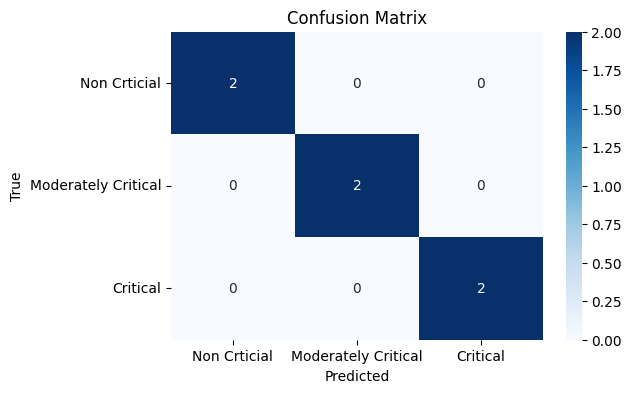

                     precision    recall  f1-score   support

       Non Crticial       1.00      1.00      1.00         2
Moderately Critical       1.00      1.00      1.00         2
           Critical       1.00      1.00      1.00         2

           accuracy                           1.00         6
          macro avg       1.00      1.00      1.00         6
       weighted avg       1.00      1.00      1.00         6



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation (add confusion matrix and classification report)
with torch.no_grad():
    inputs = torch.tensor(X_test, dtype=torch.float32)
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    y_pred = predicted.numpy()
    y_true = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print(classification_report(y_true, y_pred, target_names=classes))

## Conclusion

**Transfer learning** with **pre-trained word embedding models** is a proven strategy for tackling a wide array of NLP tasks. By leveraging the linguistic knowledge captured in large-scale embeddings (whether static or contextual), you can drastically reduce training time and data requirements, often achieving higher accuracy.

Whether you choose classic embeddings (Word2Vec, GloVe, FastText) or more advanced contextual models (ELMo, BERT, GPT), the principle remains the same: use pre-existing language understanding to give your task a jumpstart. As NLP continues to evolve, expect to see more specialized, powerful, and efficient models emerge, pushing the boundaries of what’s possible in text understanding and generation.

**Happy coding, and may your embeddings capture all the right nuances!**

---

### Further Reading & Resources

- [Word2Vec Paper](https://arxiv.org/abs/1301.3781)  
- [GloVe Paper](https://nlp.stanford.edu/pubs/glove.pdf)  
- [FastText](https://fasttext.cc/)  
- [ELMo Paper](https://arxiv.org/abs/1802.05365)  
- [BERT Paper](https://arxiv.org/abs/1810.04805)  
- [Hugging Face Transformers](https://github.com/huggingface/transformers)  
